# NumPy  SciPy

In [1]:
import numpy as np

## Задание 1 ★★☆

Разбейте массив на убывающие подмассивы.  
Подсказка: np.diff()  
Используйте библиотеку `numpy`, не используйте циклы.

In [2]:
def function_1(arr):
    # TODO
    return np.split(arr, np.where(np.diff(arr) >= 0)[0] + 1)

In [3]:
#Testing the code
a = np.array([3, 2, 1, 4, 5, 2, 0, 0, 2, 4, 1])
print("a", a)
np.diff(a)
print("Diff: ", np.diff(a))
print("Indices: ", np.where(np.diff(a) > 0)[0] + 1)
print("Result: ", np.split(a, np.where(np.diff(a) >= 0)[0] + 1))

a [3 2 1 4 5 2 0 0 2 4 1]
Diff:  [-1 -1  3  1 -3 -2  0  2  2 -3]
Indices:  [3 4 8 9]
Result:  [array([3, 2, 1]), array([4]), array([5, 2, 0]), array([0]), array([2]), array([4, 1])]


Проверка

In [4]:
function_1([3, 2, 1, 4, 5, 2, 0, 2, 4, 1])

[array([3, 2, 1]), array([4]), array([5, 2, 0]), array([2]), array([4, 1])]

In [5]:
len(function_1([3, 2, 1, 4, 5, 2, 0, 2, 4, 1])) == 5

True

In [6]:
np.random.seed(42)
len(function_1(np.random.randint(-10, 10, size=20))) == 9

True

In [7]:
np.random.seed(42)
len(function_1(np.random.randint(-10, 100, size=10))) == 4

True

Значение для формы

In [8]:
np.random.seed(21)
a = np.random.uniform(0, 3000, size=1000)
print(len(function_1(a)))

505


## Задание 2 ★★☆

Дан массив arr, необходимо найти среднее значение внутри групп, группа определена массивом g. Например, для  
`arr = [4, 2, 1, 5, 2, 5, 1, 3]` и   
`g =   [0, 1, 1, 0, 1, 0, 1, 0]` (4 относится к группе 0, 2 к группе 1 и т. д.)   
Средние по группам: `[4.25, 1.5]`  
Подсказка: `np.bincount()`   
Используйте библиотеку `numpy`, не используйте циклы.

In [9]:
def groupby(a, b):
    # Get argsort indices, to be used to sort a and b in the next steps
    sidx = b.argsort(kind='mergesort')
    a_sorted = a[sidx]
    b_sorted = b[sidx]

    # Get the group limit indices (start, stop of groups)
    cut_idx = np.flatnonzero(np.r_[True,b_sorted[1:] != b_sorted[:-1],True])

    # Split input array with those start, stop ones
    out = [a_sorted[i:j] for i,j in zip(cut_idx[:-1],cut_idx[1:])]
    return out

In [10]:
#Testing the code
a = np.array([4, 2, 1, 5, 2, 5, 1, 3])
b = np.array([0, 1, 1, 0, 1, 0, 1, 0])
c = groupby(a, b)
print("Grouped array: ", c)
print(len(c))
res = []
for k in c:
    res.append(k.mean())
print(c[0].mean())
print(res)

Grouped array:  [array([4, 5, 5, 3]), array([2, 1, 2, 1])]
2
4.25
[4.25, 1.5]


In [11]:
def function_2_my(arr, g):
    # TODO
    res = []
    c = groupby(arr, g)
    for k in c:
        res.append(k.mean())
    return np.array(res)

In [12]:
#Now, using np.bincount() method
def function_2(arr, g):
    return np.bincount(g, arr)/np.bincount(g)

In [20]:
#Test
a = [4, 2, 1, 5, 2, 5, 1, 3]
b = [0, 1, 1, 0, 1, 0, 1, 0]
print("Bincount b: ", np.bincount(b))
print("Bincount a: ", np.bincount(a))
print("Bincount b with weight a: ", np.bincount(b, a))
print("Mean: ", np.bincount(b, a)/np.bincount(b))

Bincount b:  [4 4]
Bincount a:  [0 2 2 1 1 2]
Bincount b with weight a:  [17.  6.]
Mean:  [4.25 1.5 ]


In [13]:
function_2(np.array([4, 2, 1, 5, 2, 5, 1, 3]), np.array([0, 1, 1, 0, 1, 0, 1, 0]))

array([4.25, 1.5 ])

Проверочный код

In [14]:
all(function_2(np.array([4, 2, 1, 5, 2, 5, 1, 3]), np.array([0, 1, 1, 0, 1, 0, 1, 0])) == [4.25, 1.5])

True

In [15]:
np.random.seed(42)
all(function_2(np.random.randint(0, 25, size=10), np.random.randint(0, 3, size=10)) == [12., 15.2, 10.])

True

In [16]:
np.random.seed(42)
all(function_2(np.random.randint(0, 100, size=10), np.random.randint(0, 4, size=10)) == [89., 78., 20., 54.])

True

Значение для формы

In [17]:
np.random.seed(21)
a = np.random.uniform(0, 3000, size=1000)
g = np.random.randint(0, 20, 1000)
print(np.round(function_2(a, g).sum(), 4))

30021.8043


## Задание 3 ★★★

Предположим нам даны две выборки-матрицы: обучающая X_train (размер l1 x n) и тестовая X_test (размер l2 x n), каждая строка в матрице - это вектор, описывающий объект в n-мерном пространстве. Допустим, что в ходе некоторой задачи потребовалось вычислить расстояние между векторами из тестовой и обучающей выборки. То есть для каждой строки-вектора из тестовой выборки нужно найти расстояние до каждого вектора из обучающей, таким образом мы получим матрицу dist размера l1 x l2.   

В этом задании необходимо получить матрицу расстояний dist, **не используя циклы**.
Для начала, попробуйте это сделать через два цикла и сравните эффективность с конечной реализацией через numpy.  

In [ ]:
def function_3(X_train, X_test):
    # TODO

Значение для формы

In [ ]:
%%time
np.random.seed(42)
X_train, X_test = np.random.rand(60000, 3000), np.random.rand(1000, 3000)
dist = function_3(X_train, X_test)
print(np.round(dist.sum(), 4))

## Задание 4 ★☆☆

Реализуйте функцию вычисляющую приближенную матрицу $X_k$  для матрицы $X$ заданного ранга $k$ по норме Фробениуса.   
Подсказка:   
см. семнар SciPy  
scipy.linalg.svd  

In [49]:
import scipy
from scipy.linalg import svd
from numpy.linalg import matrix_rank

In [58]:
def function_4(X, k):
    # TODO
    print("X: ", X)
    print("X shape", X.shape)
    print("X rank", matrix_rank(X))
    U, D, V = svd(X)
    print("Shapes of U, D and V: ", U.shape, D.shape, V.shape)
    print("Ranks of U, D and V: ", matrix_rank(U), matrix_rank(D), matrix_rank(V))
    sigma = np.zeros((X.shape[0], X.shape[1]))
    for i in range(k):
        sigma[i,i] = D[i]
    print("sigma shape", sigma.shape)
    print("sigma rank", matrix_rank(sigma))
    X_k = np.dot(U, np.dot(sigma, V))
    print("X_k: ", X_k)
    print("X_k shape", X_k.shape)
    print("X_k rank", matrix_rank(X_k))
    return X_k

Проверка

In [59]:
np.random.seed(42)
X = np.random.randint(0, 10, size=(4, 5))
X_k = function_4(X, 3)
(scipy.linalg.norm(X - X_k) < 2 and np.linalg.matrix_rank(X_k) == 3)

X:  [[6 3 7 4 6]
 [9 2 6 7 4]
 [3 7 7 2 5]
 [4 1 7 5 1]]
X shape (4, 5)
X rank 4
Shapes of U, D and V:  (4, 4) (4,) (5, 5)
Ranks of U, D and V:  4 1 5
sigma shape (4, 5)
sigma rank 3
X_k:  [[6.29395613 3.93074059 6.49802023 4.37786463 5.25809381]
 [8.81837437 1.4249266  6.31015646 6.76653012 4.45839895]
 [2.85604946 6.54421563 7.24581987 1.8149594  5.36331202]
 [4.04025138 1.12744621 6.93126396 5.05174097 0.89841086]]
X_k shape (4, 5)
X_k rank 3


True

In [60]:
np.random.seed(42)
X = np.random.randint(0, 10, size=(4, 5))
X_k = function_4(X, 4)
(scipy.linalg.norm(X - X_k) < 1e-10 and np.linalg.matrix_rank(X_k) == 4)

X:  [[6 3 7 4 6]
 [9 2 6 7 4]
 [3 7 7 2 5]
 [4 1 7 5 1]]
X shape (4, 5)
X rank 4
Shapes of U, D and V:  (4, 4) (4,) (5, 5)
Ranks of U, D and V:  4 1 5
sigma shape (4, 5)
sigma rank 4
X_k:  [[6. 3. 7. 4. 6.]
 [9. 2. 6. 7. 4.]
 [3. 7. 7. 2. 5.]
 [4. 1. 7. 5. 1.]]
X_k shape (4, 5)
X_k rank 4


True

Значение для формы

In [61]:
np.random.seed(42)
X = np.random.randint(0, 10, size=(100, 150))
X_k = function_4(X, 40)
print(np.round(scipy.linalg.norm(X - X_k), 3) * np.linalg.matrix_rank(X_k))

X:  [[6 3 7 ... 8 3 8]
 [2 6 5 ... 5 2 8]
 [4 7 0 ... 0 0 2]
 ...
 [6 1 0 ... 5 2 3]
 [0 7 0 ... 4 9 3]
 [2 0 4 ... 1 5 6]]
X shape (100, 150)
X rank 100
Shapes of U, D and V:  (100, 100) (100,) (150, 150)
Ranks of U, D and V:  100 1 150
sigma shape (100, 150)
sigma rank 40
X_k:  [[4.80720966 1.06853647 5.49038852 ... 9.25476259 5.17258451 8.56464183]
 [2.87791181 6.74058141 4.53021483 ... 5.19206556 0.44894201 8.44726114]
 [3.56713343 7.65493779 0.15812988 ... 0.03064089 1.94672964 3.1342966 ]
 ...
 [3.68891063 2.05509514 3.05259116 ... 3.44405992 2.64163339 3.06659287]
 [1.76922338 4.96491226 0.72520991 ... 3.92744352 7.02023693 2.80540131]
 [0.99071952 0.46317761 5.83741007 ... 3.63716643 5.39044931 3.81105155]]
X_k shape (100, 150)
X_k rank 40
7279.84


## Задание 5 ★★☆

Найдите тангенс угла наклона прямой, такой что максимальное расстояние от точек $X$ до прямой минимально. Cчитайте, что прямая проходит через начало координат.

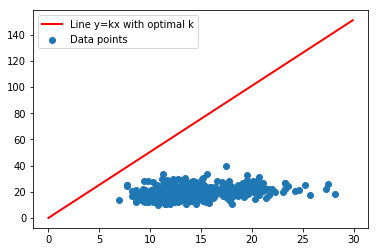

In [99]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import scipy.optimize
from math import sqrt

data = load_breast_cancer()
X = data.data[:, :2]
#print(X)
#print(X[:, 1])
#print(X.shape)
x = np.arange(0, 30, 0.1)
plt.scatter(X[:, 0], X[:, 1], label = "Data points")
plt.plot(x, 5.05*x, 'r-', lw=2, label = "Line y=kx with optimal k")
plt.legend()
plt.show()

In [84]:
def function_5(points):
    # TODO
    res = scipy.optimize.minimize(lambda k: np.amax(np.absolute(k*np.array(points[:,0])-np.array(points[:,1]))/sqrt(k**2+1)), 0)
    return res.x[0] 

Значение для формы

In [85]:
print(round(function_5(X), 3))

5.05
